# Rf 3 0 6_Condpereventerrors
Multidimensional models: conditional p.d.f. with per-event errors



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:48 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooGaussModel.h"
#include "RooDecay.h"
#include "RooLandau.h"
#include "RooPlot.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH2D.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

B-physics pdf with per-event gaussian resolution
 ----------------------------------------------------------------------------------------------

Observables

In [3]:
RooRealVar dt("dt", "dt", -10, 10);
RooRealVar dterr("dterr", "per-event error on dt", 0.01, 10);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build a gaussian resolution model scaled by the per-event error = gauss(dt,bias,sigma*dterr)

In [4]:
RooRealVar bias("bias", "bias", 0, -10, 10);
RooRealVar sigma("sigma", "per-event error scale factor", 1, 0.1, 10);
RooGaussModel gm("gm1", "gauss model scaled bt per-event error", dt, bias, sigma, dterr);

Construct decay(dt) (x) gauss1(dt|dterr)

In [5]:
RooRealVar tau("tau", "tau", 1.548);
RooDecay decay_gm("decay_gm", "decay", dt, tau, gm, RooDecay::DoubleSided);

Construct fake 'external' data  with per-event error
 ------------------------------------------------------------------------------------------------------

Use landau p.d.f to get somewhat realistic distribution with long tail

In [6]:
RooLandau pdfDtErr("pdfDtErr", "pdfDtErr", dterr, RooConst(1), RooConst(0.25));
RooDataSet *expDataDterr = pdfDtErr.generate(dterr, 10000);

Sample data from conditional decay_gm(dt|dterr)
 ---------------------------------------------------------------------------------------------

Specify external dataset with dterr values to use decay_dm as conditional p.d.f.

In [7]:
RooDataSet *data = decay_gm.generate(dt, ProtoData(*expDataDterr));

Fit conditional decay_dm(dt|dterr)
 ---------------------------------------------------------------------

Specify dterr as conditional observable

In [8]:
decay_gm.fitTo(*data, ConditionalObservables(dterr));

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bias         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=23876.4 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Plot conditional decay_dm(dt|dterr)
 ---------------------------------------------------------------------

Make two-dimensional plot of conditional p.d.f in (dt,dterr)

In [9]:
TH1 *hh_decay = decay_gm.createHistogram("hh_decay", dt, Binning(50), YVar(dterr, Binning(50)));
hh_decay->SetLineColor(kBlue);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(gm1_conv_exp(-abs(@0)/@1)_dt_tau_[decay_gm]_Int[dt,dterr]) using numeric integrator RooIntegrator1D to calculate Int(dterr)


Plot decay_gm(dt|dterr) at various values of dterr

In [10]:
RooPlot *frame = dt.frame(Title("Slices of decay(dt|dterr) at various dterr"));
for (Int_t ibin = 0; ibin < 100; ibin += 20) {
   dterr.setBin(ibin);
   decay_gm.plotOn(frame, Normalization(5.));
}

Make projection of data an dt

In [11]:
RooPlot *frame2 = dt.frame(Title("Projection of decay(dt|dterr) on dt"));
data->plotOn(frame2);

Make projection of decay(dt|dterr) on dt.

 Instead of integrating out dterr, make a weighted average of curves
 at values dterr_i as given in the external dataset.
 (The kTRUE argument bins the data before projection to speed up the process)

In [12]:
decay_gm.plotOn(frame2, ProjWData(*expDataDterr, kTRUE));

[#1] INFO:Plotting -- RooAbsReal::plotOn(decay_gm) plot on dt averages using data variables (dterr)
[#1] INFO:Plotting -- RooDataWeightedAverage::ctor(decay_gmDataWgtAvg) constructing data weighted average of function decay_gm_Norm[dt] over 100 data points of (dterr) with a total weight of 10000
.........................................................................................................................................................................................................................

Draw all frames on canvas

In [13]:
TCanvas *c = new TCanvas("rf306_condpereventerrors", "rf306_condperventerrors", 1200, 400);
c->Divide(3);
c->cd(1);
gPad->SetLeftMargin(0.20);
hh_decay->GetZaxis()->SetTitleOffset(2.5);
hh_decay->Draw("surf");
c->cd(2);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.6);
frame->Draw();
c->cd(3);
gPad->SetLeftMargin(0.15);
frame2->GetYaxis()->SetTitleOffset(1.6);
frame2->Draw();

Draw all canvases 

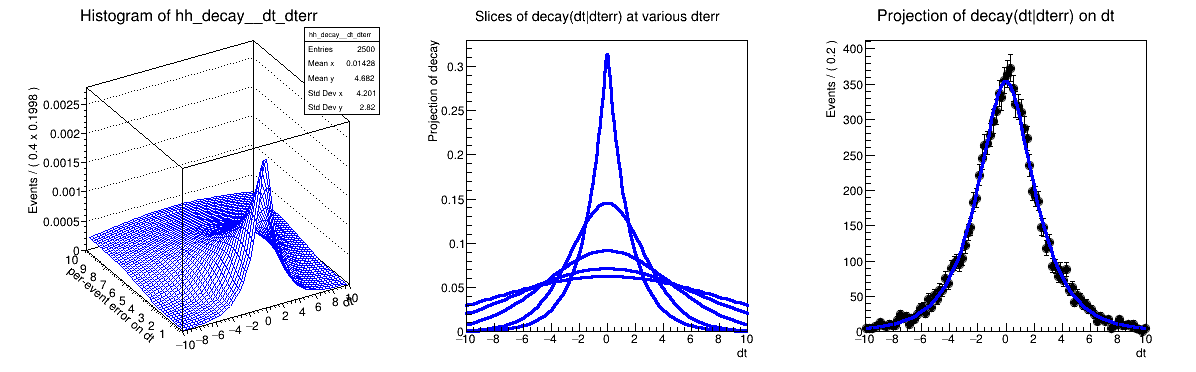

In [14]:
gROOT->GetListOfCanvases()->Draw()